2018-07-22
             Close    Open    High     Low    Volume  Change
Date                                                        
2018-07-17  413000  410500  418000  410500  103070.0  0.0073
2018-07-18  414500  418000  418000  411500   98240.0  0.0036
2018-07-19  423500  415500  434500  415500  289070.0  0.0217
2018-07-20  424500  426500  429500  420500  109040.0  0.0024
2018-07-22  424500  424500  424500  424500       0.0  0.0000


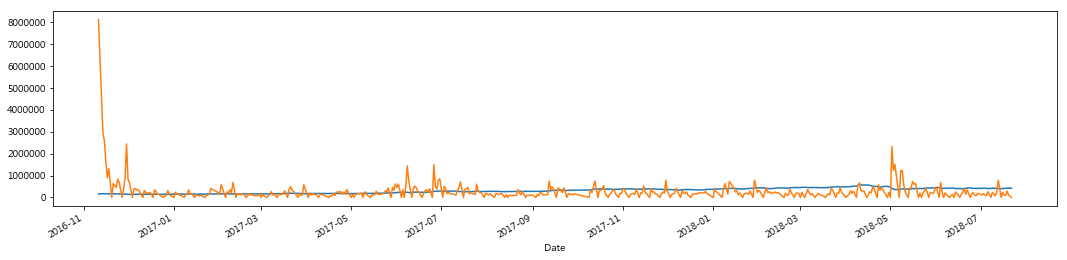

In [1]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

plt.figure(figsize=(15,9))
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

today = date.today()
startday = date.today() - timedelta(720)
yesterday = date.today() - timedelta(1)
#startday = '3/14/2014'
#yesterday = '4/14/2016'
print(yesterday)
#GoogleDailyReader??

SEC = web.DataReader("207940", startday, yesterday)
#SEC = web.get_data_yahoo("005930.KS", startday, yesterday)
print(SEC.tail())
SEC['Close'].plot(figsize=(18,4))
SEC['Volume'].plot(figsize=(18,4))
plt.show()


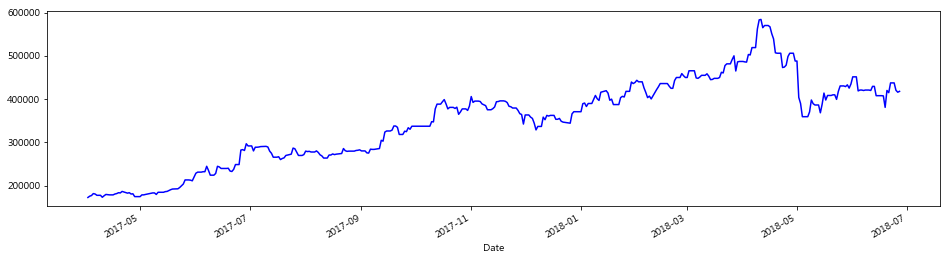

In [2]:
SEC['2017-04-01':'2018-06-27']['Close'].plot(figsize=(16,4), style='b')
plt.show()


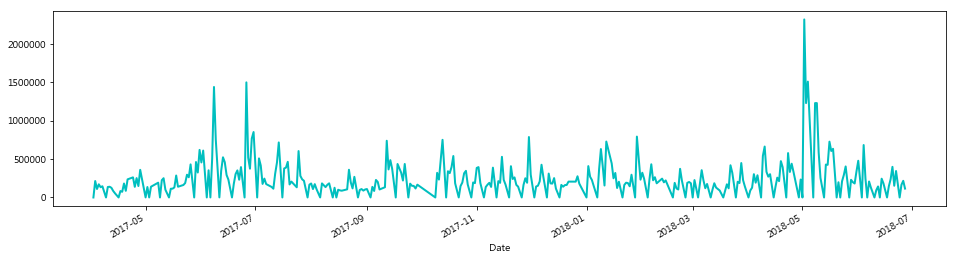

In [8]:
SEC['2017-04-01':'2018-06-27']['Volume'].plot(figsize=(16,4), style='c', lw='2')
plt.show()


In [9]:
import math 
logA = round(math.log(1500/1000),3)* 100
logA

40.5

In [10]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import numpy as np
import datetime

%matplotlib inline
plt.figure(figsize=(15,9))
today = date.today()
startday = date(2018,4,1)
endday = date(2018,6,27)
SEC = web.DataReader("207940", startday, endday)
SEC = SEC[SEC['Volume'] != 0]
SEC['Close'].head()

# 1 씩 shift
SEC['Close'].shift(1).head()
# 수익률 계산
SEC['Rate'] = np.log( SEC['Close'].astype(float) / SEC['Close'].shift(1).astype(float))
SEC.head()


,Close,Open,High,Low,Volume,Change,Rate
Date,,,,,,,
2018-04-02,486000,487000,490000,482500,90650.0,-0.0021,NaN
2018-04-03,485500,484000,489500,480000,127370.0,-0.0010,-0.001029
2018-04-04,503000,490000,505000,486000,304040.0,0.0360,0.035411
2018-04-05,502000,501000,505000,496500,192790.0,-0.0020,-0.001990
2018-04-06,519000,509000,534000,508000,289480.0,0.0339,0.033304


<Figure size 1080x648 with 0 Axes>

In [11]:
SEC = web.DataReader("207940", startday, endday)
SEC.dtypes

Close       int64
Open        int64
High        int64
Low         int64
Volume    float64
Change    float64
dtype: object

In [21]:
# 로그 수익률 = 미래가격/처음가격 → 최종 수익률과 수익률 합이 일치
SEC['Rate'] = np.log( SEC['Close'].astype(float) / SEC['Close'].shift(1).astype(float))

SEC.head()

,Close,Open,High,Low,Volume,Change,Rate,MA_5,MA_20,diff
Date,,,,,,,,,,
2018-04-01,487000,487000,487000,487000,0.0,0.0000,NaN,NaN,NaN,NaN
2018-04-02,486000,487000,490000,482500,90650.0,-0.0021,-0.002055,NaN,NaN,NaN
2018-04-03,485500,484000,489500,480000,127370.0,-0.0010,-0.001029,NaN,NaN,NaN
2018-04-04,503000,490000,505000,486000,304040.0,0.0360,0.035411,NaN,NaN,NaN
2018-04-05,502000,501000,505000,496500,192790.0,-0.0020,-0.001990,492700.0,NaN,NaN


In [24]:
# 미래가격
SEC['Close'].head()

Date
2018-04-01    487000
2018-04-02    486000
2018-04-03    485500
2018-04-04    503000
2018-04-05    502000
Name: Close, dtype: int64

In [23]:
# 처음가격 컬럼
# shift 함수 : 해당 데이터를 인덱스 기준 n만큼 이동
SEC['Close'].shift(1).head(0)


Series([], Name: Close, dtype: float64)

In [26]:
import FinanceDataReader as fdr

# 한국거래소 상장종목 전체코드
df_krx = fdr.StockListing('KRX')
# df_krx.head()
df_krx.to_csv("./dataset/corpCodes.csv",encoding = 'utf-8')

In [25]:
SEC.describe()

,Close,Open,High,Low,Volume,Change,Rate,MA_5,MA_20,diff
count,75.000000,75.000000,75.000000,75.000000,7.500000e+01,75.000000,74.000000,71.000000,56.000000,56.000000
mean,450086.666667,450440.000000,460186.666667,442440.000000,3.223687e+05,-0.001261,-0.002065,449870.422535,442792.410714,-17358.482143
std,59052.963707,58932.334079,58845.352370,58435.570896,3.869662e+05,0.039145,0.040309,57612.586408,43860.636970,32883.923357
min,359500.000000,357000.000000,359500.000000,350000.000000,0.000000e+00,-0.172100,-0.188901,375400.000000,394900.000000,-100375.000000
25%,408500.000000,410000.000000,419250.000000,403750.000000,1.049450e+05,-0.011300,-0.011672,408500.000000,417081.250000,-38112.500000
50%,429000.000000,428500.000000,436500.000000,421000.000000,2.301800e+05,0.000000,0.000000,425900.000000,422900.000000,-9037.500000
75%,493250.000000,495500.000000,503500.000000,486500.000000,4.019800e+05,0.009400,0.009407,492950.000000,461818.750000,6518.750000
max,584000.000000,587000.000000,600000.000000,570000.000000,2.320000e+06,0.102400,0.097455,574400.000000,529225.000000,26350.000000


In [27]:
SEC['MA_5']=SEC['Close'].rolling(window=5).mean()
SEC['MA_20']=SEC['Close'].rolling(window=20).mean()
SEC['diff']=SEC['MA_5']-SEC['MA_20']

# 맨 끝에서 5개의 로우데이터들만 출력
SEC.tail(5)

,Close,Open,High,Low,Volume,Change,Rate,MA_5,MA_20,diff
Date,,,,,,,,,,
2018-06-22,437500,419500,445500,415500,344810.0,0.0542,0.052798,412200.0,421250.0,-9050.0
2018-06-24,437500,437500,437500,437500,0.0,0.0000,0.000000,418200.0,421375.0,-3175.0
2018-06-25,420500,438000,438500,418000,165000.0,-0.0389,-0.039632,426100.0,419825.0,6275.0
2018-06-26,416000,410000,419000,400500,217020.0,-0.0107,-0.010759,425300.0,418050.0,7250.0
2018-06-27,418000,414500,426500,413000,115660.0,0.0048,0.004796,425900.0,418000.0,7900.0


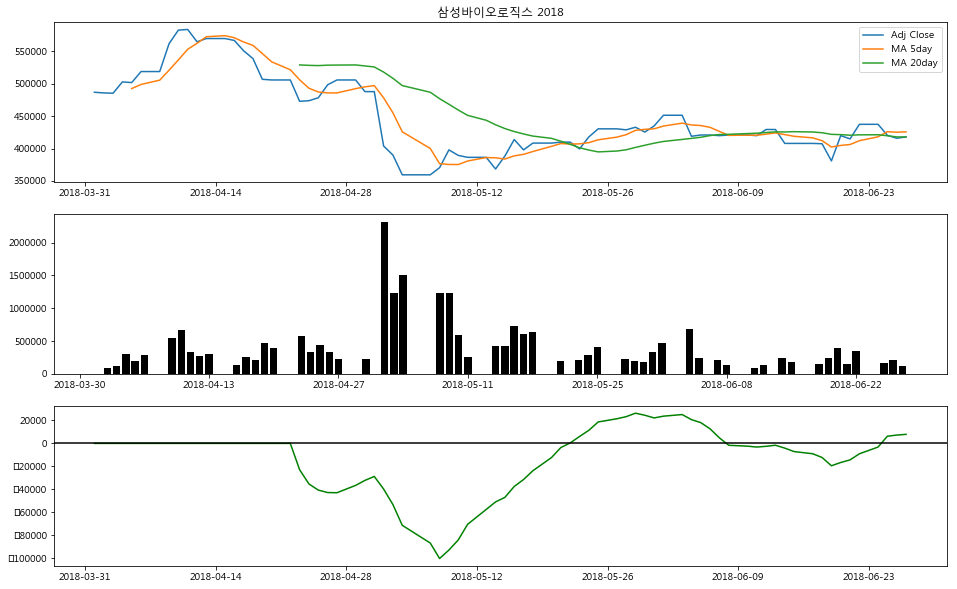

In [28]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (16,10))

#price (가격)
plt.subplot(311)
plt.plot(SEC.index, SEC['Close'], label = 'Adj Close')
plt.plot(SEC.index, SEC['MA_5'], label='MA 5day')
plt.plot(SEC.index, SEC['MA_20'], label='MA 20day')
plt.title(u'삼성바이오로직스 2018')
plt.legend(loc='best')

# volume (거래량)
plt.subplot(312)
plt.bar(SEC.index, SEC['Volume'], color='black')

#  이동평균 차이 (diff)
diffChart = plt.subplot(313)
diffChart.plot(SEC.index, SEC['diff'].fillna(0), color='g')
plt.axhline(y=0, color='k')


### 이동평균(MovingAverage)길이:
MA를 계산하기 위해 사용하는 연속적 관측치의 수.



데이터를 "평활화"하여 잡음(불규칙한 변동)을 줄여 패턴이 더 분명하게 보이도록 하기.

그러나 데이터를 너무 많이 평활화하여 중요한 상세 정보가 유실되는 일은 없도록 해야 함. 

※ MA구간 값 ▲ = MA선의 평활화 커짐. ||
MA구간 값 ▼ = MA선의 평활화 적음.

※MA구간 값의 홀수화: MA중심 값 * 예측주차 계절성지수 / 과거 계절성 지수 * Season impact 로 예측값 계산 가능